In [2]:
import pandas as pd
%pylab
%matplotlib inline
from matplotlib.colors import ListedColormap

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

In [4]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


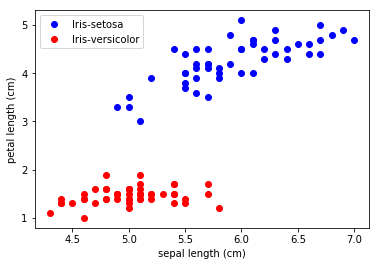

In [5]:
plot(X[y==1,0],X[y==1,1],'bo',label='Iris-setosa');
plot(X[y==-1,0],X[y==-1,1],'ro',label='Iris-versicolor');
xlabel('sepal length (cm)');
ylabel('petal length (cm)');
legend(loc='upper left');

In [6]:
theta = np.zeros(1 + X.shape[1])
error_list = []
ite = 10
mu = 0.1
theta_list = []
for i in range(ite):
    error = 0
    for xi, yi in zip(X, y):
        
        update = mu * (yi - np.where(np.dot(xi, theta[1:]) + theta[0]>0.,1,-1 ))
        theta[1:] += update * xi
        theta[0] += update
        theta_list.append(theta.copy())
        error += int(update != 0.0)/100
        
    error_list.append(error)

In [7]:
len(theta_list)
theta_list[-1]

array([-0.4 , -0.7 ,  1.84])

In [8]:
theta_arr = np.zeros((len(theta_list),3))
for i in range(len(theta_list)):
    theta_arr[i] = theta_list[i]

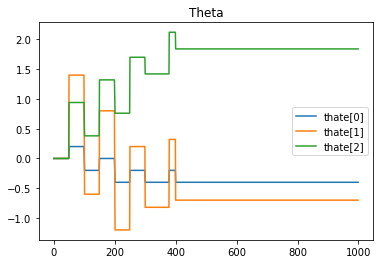

In [9]:
plt.plot(theta_arr[:,0],label = 'thate[0]')
plt.plot(theta_arr[:,1],label = 'thate[1]')
plt.plot(theta_arr[:,2],label = 'thate[2]')
plt.title('Theta')
plt.legend()
plt.show()



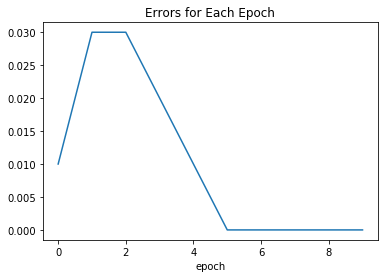

In [10]:
plt.title('Errors for Each Epoch')
plt.xlabel('epoch')
plt.plot(error_list)
plt.show()

In [11]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),np.arange(x2_min, x2_max, 0.01))
XX = np.array([xx1.ravel(), xx2.ravel()]).T


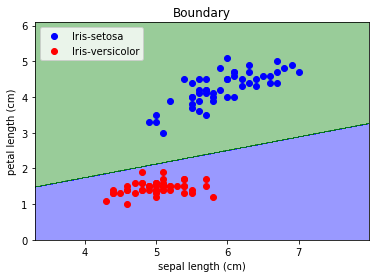

In [12]:
Z = np.where(np.dot(XX, theta_list[-1][1:]) + theta_list[-1][0]>0.,1,-1 ).reshape(xx1.shape)
markers = ('s', 'x', 'o', '^', 'v')
colors = ('blue', 'green')
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    #plt.plot(xx1,Z)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plot(X[y==1,0],X[y==1,1],'bo',label='Iris-setosa')
plot(X[y==-1,0],X[y==-1,1],'ro',label='Iris-versicolor')
xlabel('sepal length (cm)')
ylabel('petal length (cm)')
legend(loc='upper left')

plt.title('Boundary')

In [13]:
def perceptron(mu):
    theta = np.zeros(1 + X.shape[1])
    error_list = []
    ite = 10
    theta_list = []
    for i in range(ite):
        error = 0
        for xi, yi in zip(X, y):

            update = mu * (yi - np.where(np.dot(xi, theta[1:]) + theta[0]>0.,1,-1 ))
            theta[1:] += update * xi
            theta[0] += update
            theta_list.append(theta.copy())
            error += int(update != 0.0)/100

        error_list.append(error)
    return error_list


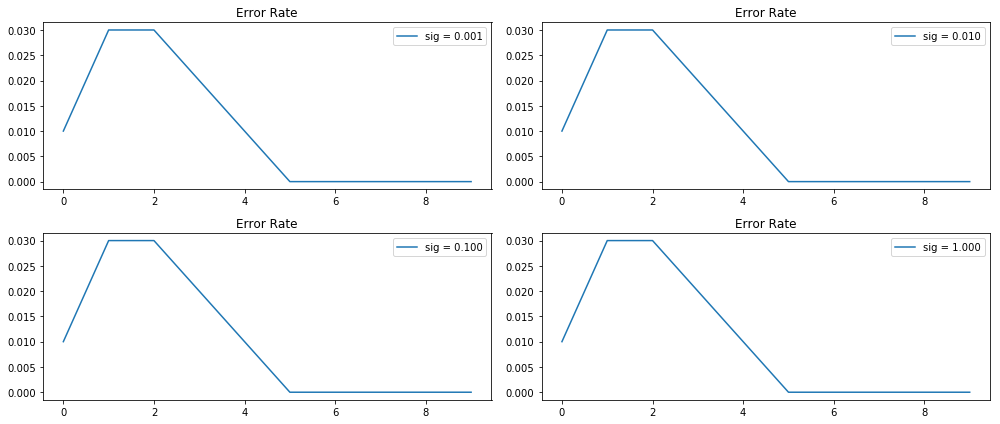

In [14]:
fig, axes = plt.subplots(2,2, figsize=(14,6))
plt.title('Error Rate')
axes = axes.ravel()

learn_rate = [0.001,0.01,0.1,1]
for i in range(len(learn_rate)):
    axes[i].set_title('Error Rate')
    axes[i].plot(perceptron(learn_rate[i]),label = 'sig = %.3f'%learn_rate[i] ) 
    axes[i].legend()   
plt.tight_layout() 


<font color = "blue">
### Comment
Varying the learning rate has no effect on the error rate.

### Linear SVM

In [21]:
#from sklearn import LinearSVC
import sklearn
clf = sklearn.svm.LinearSVC()
clf.fit(X, y)  

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

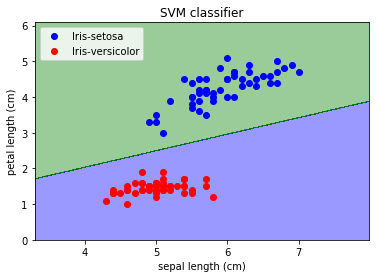

In [22]:


Z1 = clf.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
markers = ('s', 'x', 'o', '^', 'v')
colors = ('blue', 'green')
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.contourf(xx1, xx2, Z1, alpha=0.4, cmap=cmap)
    #plt.plot(xx1,Z)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plot(X[y==1,0],X[y==1,1],'bo',label='Iris-setosa')
plot(X[y==-1,0],X[y==-1,1],'ro',label='Iris-versicolor')
xlabel('sepal length (cm)')
ylabel('petal length (cm)')
legend(loc='upper left')
plt.title('SVM classifier')

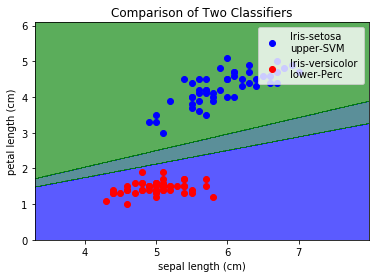

In [27]:
#Z = np.where(np.dot(XX, theta_list[-1][1:]) + theta_list[-1][0]>0.,1,-1 ).reshape(xx1.shape)


Z1 = clf.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
markers = ('s', 'x', 'o', '^', 'v')
colors = ('blue', 'green')
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.contourf(xx1, xx2, Z1, alpha=0.4, cmap=cmap,label = 'SVM')
    #plt.plot(xx1,Z)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plot(X[y==1,0],X[y==1,1],'bo',label='Iris-setosa \nupper-SVM')
plot(X[y==-1,0],X[y==-1,1],'ro',label='Iris-versicolor \nlower-Perc')
xlabel('sepal length (cm)')
ylabel('petal length (cm)')
legend(loc='upper left')

plt.title('Boundary')
Z = np.where(np.dot(XX, theta_list[-1][1:]) + theta_list[-1][0]>0.,1,-1 ).reshape(xx1.shape)
markers = ('s', 'x', 'o', '^', 'v')
colors = ('blue', 'green')
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap,label = 'Perceptron')
    #plt.plot(xx1,Z)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.legend(loc='upper right')

plt.title('Comparison of Two Classifiers')
plt.show()

### Non-linear SVM

In [15]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X, y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

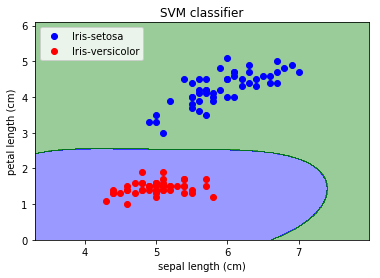

In [16]:


Z1 = clf.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
markers = ('s', 'x', 'o', '^', 'v')
colors = ('blue', 'green')
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.contourf(xx1, xx2, Z1, alpha=0.4, cmap=cmap)
    #plt.plot(xx1,Z)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plot(X[y==1,0],X[y==1,1],'bo',label='Iris-setosa')
plot(X[y==-1,0],X[y==-1,1],'ro',label='Iris-versicolor')
xlabel('sepal length (cm)')
ylabel('petal length (cm)')
legend(loc='upper left')
plt.title('SVM classifier')

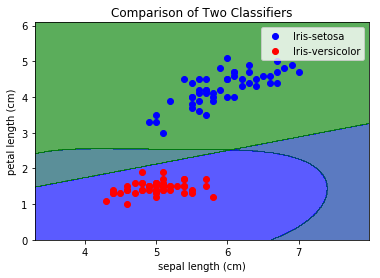

In [17]:
#Z = np.where(np.dot(XX, theta_list[-1][1:]) + theta_list[-1][0]>0.,1,-1 ).reshape(xx1.shape)


Z1 = clf.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
markers = ('s', 'x', 'o', '^', 'v')
colors = ('blue', 'green')
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.contourf(xx1, xx2, Z1, alpha=0.4, cmap=cmap,label = 'SVM')
    #plt.plot(xx1,Z)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plot(X[y==1,0],X[y==1,1],'bo',label='Iris-setosa')
plot(X[y==-1,0],X[y==-1,1],'ro',label='Iris-versicolor')
xlabel('sepal length (cm)')
ylabel('petal length (cm)')
legend(loc='upper left')

plt.title('Boundary')
Z = np.where(np.dot(XX, theta_list[-1][1:]) + theta_list[-1][0]>0.,1,-1 ).reshape(xx1.shape)
markers = ('s', 'x', 'o', '^', 'v')
colors = ('blue', 'green')
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap,label = 'Perceptron')
    #plt.plot(xx1,Z)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.legend(loc='upper right')

plt.title('Comparison of Two Classifiers')
plt.show()

<font color = "blue">
### Comment
The Perceptron does not try to optimize the separation "distance". As long as it finds a hyperplane that separates the two sets, it is good. SVM on the other hand tries to maximize the "support vector", i.e., the distance between two closest opposite sample points.

The SVM typically tries to use a "kernel function" to project the sample points to high dimension space to make them linearly separable, while the perceptron assumes the sample points are linearly separable.

Therefore, SVM is more complicated and have a better performance than Perceptron